## **Model LSTM**

---

Uji Coba #1

Penelitian                             : [link Dataset](https://github.com/katoch99/Twitter-Emotion-Recognition)

### 01. Installing nlp package

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import numpy as np

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import seaborn as sns


### 02. Load Data

In [7]:
df = pd.read_csv('..\Dataset\Training\Clean_train_data2.csv')
df.head(20)

,Unnamed: 0,label,tweet
0,0,happy,"['membahagiakan', 'biasku', 'foto', 'elf']"
1,1,anger,"[ , , , 'menduduki', 'bangku', 'jabatan', 'r..."
2,2,fear,"['yaudah', 'berani', 'potong', 'rambut', 'pend..."
3,3,fear,"['semalam', 'rekap', 'eh', 'intinya', 'usahain..."
4,4,anger,"['teman', 'turned', 'out', 'being', 'hole', 'c..."
5,5,sadness,"['terkadang', 'dapati', 'miliki', 'menginginka..."
6,6,fear,"['tamsil', 'islam', 'nusantara', 'tiang', 'dip..."
7,7,anger,"[ , 'gini', 'pertanyaannya', 'kah', 'mahasiswa..."
8,8,love,"['kamuu', 'special', 'cintanya', 'kalah', 'cin..."
9,9,happy,"['kasarnya', 'bilang', 'pakai', 'dengerin', 'm..."


In [8]:
print("Null Values:")
df.isna().sum()

Null Values:


Unnamed: 0    0
label         0
tweet         0
dtype: int64

### 03. Label Proposition

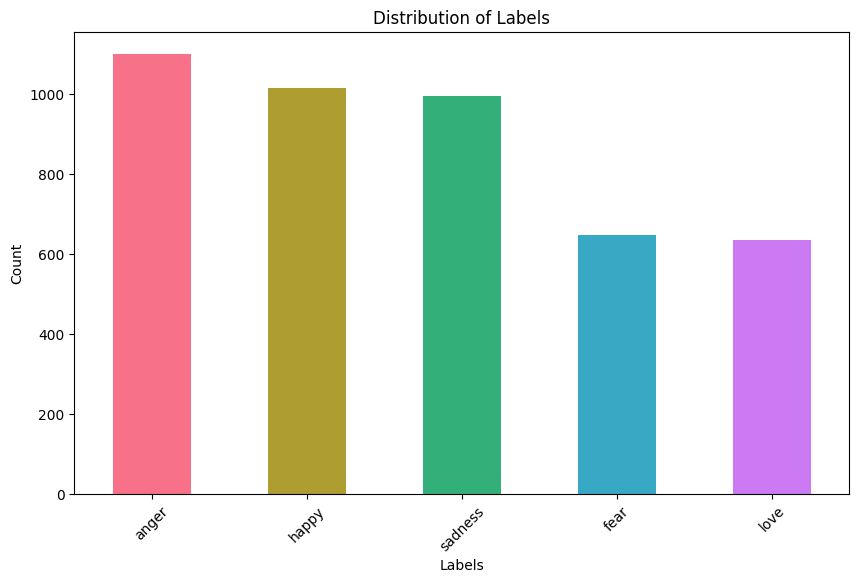

In [9]:
label_counts = df["label"].value_counts()

# Generate a color palette with a unique color for each label
palette = sns.color_palette("husl", len(label_counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=palette)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [10]:
def get_tweets(data):
    tweets = data['tweet'].tolist()
    labels = data['label'].tolist()
    return tweets, labels

tweets, labels = get_tweets(df)

In [11]:
train_tweets, val_tweets, train_labels, val_labels = train_test_split('Tweet', 'Label', test_size=0.2, random_state=42)

In [12]:
data = pd.DataFrame({'Tweet': tweets, 'Label': labels})

train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

train_tweets = train_data['Tweet'].tolist()
train_labels = train_data['Label'].tolist()
val_tweets = val_data['Tweet'].tolist()
val_labels = val_data['Label'].tolist()

print("Training Tweets:", train_tweets)
print("Training Labels:", train_labels)
print("Validation Tweets:", val_tweets)
print("Validation Labels:", val_labels)


Training Tweets: ["['ampun', 'tuhan', 'terlampau', 'sibuk', 'membangun', 'mesjid', 'lupa', 'bersujud', 'mu', 'fasih', 'membaca', 'kitab', 'suci', 'mu', 'menemukan', 'mu']", "['terkadang', 'minat', 'tuh', 'pegawai', 'bpom', 'ambil', 'umb', 'unj', 'jurusan', 'kimia', 'murni', 'daya', 'si', 'gunadarma', 'boro', 'it', 'staff', 'abis', 'hahahaha', 'minat', 'lab', 'muncul', 'telat', 'siss']", "['kppn', 'akun', 'facebook', 'ig', 'twitter', 'dipost', 'kppn', 'umum', 'sempet', 'update', 'medsos', 'kantor', 'sdgkan', 'medsos', 'susah', 'cari', 'konten', 'dyaar']", "['cinta', 'berbeda', 'mencari', 'salah', 'tim', 'tujuan']", "['elah', 'kog', 'hidup', 'tngh', 'kelilingin', 'saudara', 'mama', 'jahat', 'sirikan', 'gila', 'jahat', 'dengki', 'bocengli', 'najisin', 'sudi', 'pindah', 'kanada', 'hubby', 'mapan', 'mature', 'donk']", "['jam', 'nongol', 'eh', 'jam', 'ditelponin', 'bilangnya', 'tkp', 'kost', 'lantai', 'kamar', 'super', 'gede', 'lengang', 'tunggu', 'waswas', 'sms', 'dijemput']", "['sayang', '

### Padding and Truncating Sequences

In [13]:
# Tokenizer initialization and fitting on training data
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(train_tweets)

print(tokenizer.texts_to_sequences([tweets[10]]))

[[107, 301, 100, 218, 2222, 82, 1, 6, 45, 254, 1585, 3459, 1355, 665, 82, 1, 93, 43, 183, 385, 73]]


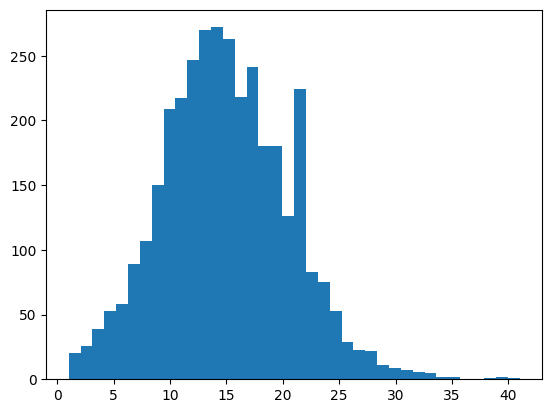

In [14]:
lengths = [len(t.split(' ')) for t in train_tweets]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [15]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    if sequences:
        padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
        return padded_sequences
    else:
        return None

In [16]:
padded_train_sequences = get_sequences(tokenizer, train_tweets)

In [17]:
padded_train_sequences[10]

array([ 15, 253,   9,   5,   9, 199, 189,  25,   9,   9,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

### Menyiapkan Label

In [18]:
classes = set(labels)
print(classes)

{'fear', 'love', 'sadness', 'happy', 'anger'}


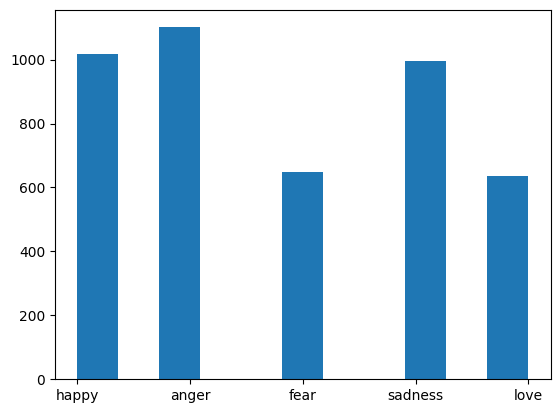

In [19]:
plt.hist(labels, bins=11)
plt.show()

In [20]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [21]:
classes_to_index

{'fear': 0, 'love': 1, 'sadness': 2, 'happy': 3, 'anger': 4}

In [22]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [23]:
# Converting text sequences to sequences of integers
padded_train_sequences = get_sequences(tokenizer, train_tweets)
val_sequences = get_sequences(tokenizer, val_tweets)

# Mapping label names to integer indices
train_labels = names_to_ids(train_labels)
val_labels = names_to_ids(val_labels)

In [24]:
print(val_labels)

[2 3 3 4 3 2 3 2 3 2 2 2 1 3 3 4 3 4 0 1 2 0 3 3 3 2 1 2 1 0 3 2 2 2 3 4 2
 3 1 2 3 4 3 3 2 4 2 4 0 4 3 2 0 3 2 3 1 0 1 2 4 0 3 3 2 3 4 3 0 3 3 2 2 1
 4 1 3 0 4 3 1 4 0 2 2 1 4 2 2 2 4 3 3 4 0 2 4 0 3 1 4 1 3 0 1 1 3 3 4 3 3
 4 2 2 2 1 2 3 2 3 1 0 1 4 0 0 2 4 0 4 0 3 2 4 4 1 4 2 3 4 1 3 4 2 3 3 3 4
 1 1 2 1 4 1 2 4 1 3 2 3 2 0 1 1 2 2 4 0 1 3 3 0 3 4 4 4 0 0 2 2 3 2 4 3 0
 1 2 0 0 0 4 2 3 4 1 4 0 2 2 1 1 1 2 2 2 4 1 2 3 1 2 3 0 3 1 0 0 0 0 0 0 4
 3 1 2 3 3 2 2 4 2 2 2 0 4 4 4 3 2 2 4 4 2 2 2 4 0 0 4 4 3 1 2 1 3 3 1 3 2
 4 4 3 4 3 3 3 4 2 4 1 4 3 1 4 4 1 2 4 2 1 3 3 2 1 4 4 3 4 0 2 1 3 4 0 1 3
 2 4 2 3 0 1 3 4 3 4 2 2 1 1 3 1 2 4 1 2 2 3 4 4 0 4 2 1 3 1 3 2 3 4 3 4 2
 1 2 1 4 4 2 4 2 4 3 1 0 2 4 2 0 1 4 3 2 3 2 2 4 0 4 4 2 2 2 4 4 3 2 0 2 4
 3 4 4 3 3 0 2 4 1 0 4 2 2 3 4 4 3 3 0 2 4 4 4 4 0 3 1 4 4 4 0 3 4 2 4 3 4
 0 2 2 4 2 2 3 4 3 4 3 2 2 1 4 0 4 1 2 2 1 3 0 4 0 2 3 0 3 3 2 4 4 4 2 3 0
 4 4 4 1 1 2 0 2 1 1 2 3 4 3 4 2 0 4 2 3 1 3 2 0 0 4 0 0 0 3 1 0 0 1 2 3 4
 4 4 2 4 1 0 4 4 3 0 0 1 

### Modelling

In [25]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Define the callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    patience=5,              
    restore_best_weights=True  
)


c:\Users\TEMP\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [26]:
h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=20,
    callbacks=[early_stopping_callback]
)

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.2317 - loss: 1.6788 - val_accuracy: 0.3008 - val_loss: 1.5627
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3229 - loss: 1.4768 - val_accuracy: 0.4075 - val_loss: 1.3398
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5006 - loss: 1.1286 - val_accuracy: 0.4336 - val_loss: 1.3385
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6408 - loss: 0.9160 - val_accuracy: 0.4608 - val_loss: 1.3818
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7109 - loss: 0.7183 - val_accuracy: 0.5233 - val_loss: 1.4479
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8479 - loss: 0.4923 - val_accuracy: 0.5539 - val_loss: 1.5506
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9324 - loss: 0.2753 - val_accuracy: 0.5698 - val_loss: 1.6369
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9541 - loss: 0.2029 - val_accu

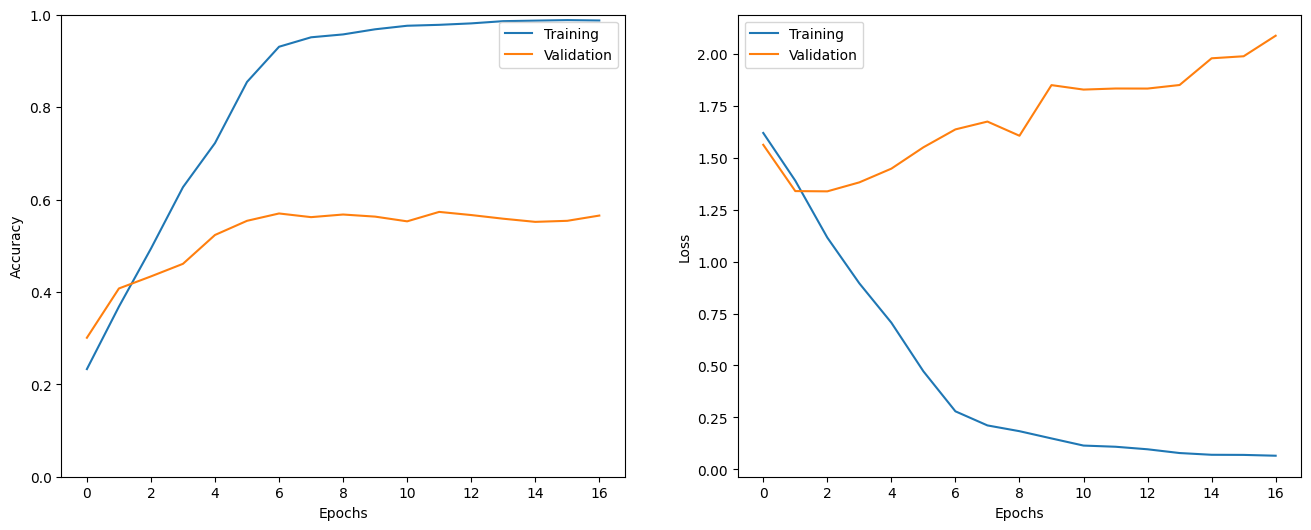

In [27]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

In [29]:
test = pd.read_csv('..\Dataset\\Training\\not_preposessing.csv')

In [30]:
test_tweets, test_labels = get_tweets(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [37]:
eval = model.evaluate(test_sequences, test_labels)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type NoneType).

In [40]:
for a in range(0,5):
  i = random.randint(0, len(test_labels) - 1)

  print('Tweet:', test_tweets[i])
  print('Actual Emotion:', index_to_classes[test_labels[i]])
  pred_prob = model.predict(np.expand_dims(test_sequences[i], axis=0))
  predicted_class_index = np.argmax(pred_prob)
  predicted_class = index_to_classes[predicted_class_index]
  
  print('Predicted Emotion:', predicted_class, '\n')

Tweet: ya, sdikit tp biasa sih


KeyError: None

In [ ]:
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 5)), labels=classes)
    plt.yticks(list(range(0, 5)), labels=classes)
    plt.colorbar(ctx)
    plt.show()
    
show_confusion_matrix(test_labels, preds, list(classes))

NameError: name 'preds' is not defined